In [27]:
import ROOT
from ROOT import RDataFrame
from ROOT import TChain, TSelector, TTree, TH1F, TCanvas, TFile, TEfficiency, TLegend
from ROOT import TLorentzVector
from ROOT import TVector3
from array import array
import numpy as np

In [2]:
ROOT.gROOT.SetBatch(ROOT.kTRUE)

In [4]:
#file ="/content/drive/My Drive/ntuple_mumuHZZ4mu_final.root/T"
#tree = TTree(file)
#tree.Add(file);

file ="./ntuple_mumuHZZ4mu_final.root"
f = TFile(file)  #open the rootfile
tree = f.Get("T"). #load the tree


In [5]:
N = tree.GetEntries()
print("total number of events=",N)

total number of events= 10000


In [6]:
 hGenMu1Pt = TH1F("hGenMu1Pt","Gen Muon 1 Pt",200,0,200)
 hGenMu2Pt = TH1F("hGenMu2Pt","Gen Muon 2 Pt",200,0,200)
 hGenMu3Pt = TH1F("hGenMu3Pt","Gen Muon 3 Pt",200,0,200)
 hGenMu4Pt = TH1F("hGenMu4Pt","Gen Muon 4 Pt",200,0,200)


In [7]:
hRecoMu1Pt = TH1F("hRecoMu1Pt","Reco Muon 1 Pt",200,0,200)
hRecoMu2Pt = TH1F("hRecoMu2Pt","Reco Muon 2 Pt",200,0,200)
hRecoMu3Pt = TH1F("hRecoMu3Pt","Reco Muon 3 Pt",200,0,200)
hRecoMu4Pt = TH1F("hRecoMu4Pt","Reco Muon 4 Pt",200,0,200)

In [55]:
histoNum_Pt = TH1F("histoNum_Pt","Gen Muon Pt after matching with reco",200,0,200)
histoDen_Pt = TH1F("histoDen_Pt","Gen Muon Pt before matching with reco",200,0,200)
hPtRes  = TH1F("hPtRes","hPtRes", 100,-0.5,0.5)

Warning in <TFile::Append>: Replacing existing TH1: histoNum_Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histoDen_Pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hPtRes (Potential memory leak).


Now start looping on events

In [56]:
hGenMu1Pt.Reset()
hGenMu2Pt.Reset()
hGenMu3Pt.Reset()
hGenMu4Pt.Reset()
hRecoMu1Pt.Reset()
hRecoMu2Pt.Reset()
hRecoMu3Pt.Reset()
hRecoMu4Pt.Reset()
histoNum_Pt.Reset()
histoDen_Pt.Reset()

#for i in range(N):  #to loop on all the events in the rootfile
nevt=1000
for i in range(nevt):
  tree.GetEntry(i)
  print("----- event", i)
  n_genpart = tree.nmcp
  print("ngenpart=",n_genpart)
  GenMuonList = []
  RecoMuonList = []
  for pdg, st, ene, px, py, pz in zip(tree.mcpdg, tree.mcgst, tree.mcene, tree.mcmox, tree.mcmoy, tree.mcmoz):
    if(abs(pdg)==13 and st==1):  #only stable muons produced after muon beam scattering
     #print("sim mu energy=", ene)
     genMuonVector = TLorentzVector()  #create a TLorentzVector
     genMuonVector.SetPxPyPzE(px,py,pz,ene) #fill it with stable muons 4-momentum coordinates
     print("gen mu pt=", genMuonVector.Pt())  #the method Pt() does all the calculations
     GenMuonList.append(genMuonVector)   # create a list of TLorentz vector
  #print("stored muons",len(GenMuonList))
  if(len(GenMuonList)==4):
    HiggsMC = TLorentzVector()
    HiggsMC = GenMuonList[0] + GenMuonList[1] + GenMuonList[2] + GenMuonList[3];
    #print("H mass=",HiggsMC.M())
    MuonMC_ptList = []
    MuonMC_ptList.append(GenMuonList[0].Pt())
    MuonMC_ptList.append(GenMuonList[1].Pt())
    MuonMC_ptList.append(GenMuonList[2].Pt())
    MuonMC_ptList.append(GenMuonList[3].Pt())
    #MuonMC_ptList.sort()

    hGenMu1Pt.Fill(MuonMC_ptList[0])
    hGenMu2Pt.Fill(MuonMC_ptList[1])
    hGenMu3Pt.Fill(MuonMC_ptList[2])
    hGenMu4Pt.Fill(MuonMC_ptList[3])


  for id, ene, px, py, pz in zip(tree.rctyp, tree.rcene, tree.rcmox, tree.rcmoy, tree.rcmoz):
    if(abs(id)==13):
     #print("reco mu ene=", ene)
     recoMuonVector = TLorentzVector()
     recoMuonVector.SetPxPyPzE(px,py,pz,ene)
     print("reco mu pt=", recoMuonVector.Pt())
     RecoMuonList.append(recoMuonVector)
  #print("stored reco muons",len(RecoMuonList))
  if(len(RecoMuonList)==4):
    HiggsReco = TLorentzVector()
    HiggsReco = RecoMuonList[0] + RecoMuonList[1] + RecoMuonList[2] + RecoMuonList[3];
    #print("Reco H mass=",HiggsReco.M())
    MuonReco_ptList = []
    MuonReco_ptList.append(RecoMuonList[0].Pt())
    MuonReco_ptList.append(RecoMuonList[1].Pt())
    MuonReco_ptList.append(RecoMuonList[2].Pt())
    MuonReco_ptList.append(RecoMuonList[3].Pt())
    #MuonReco_ptList.sort()
    hRecoMu1Pt.Fill(MuonReco_ptList[0])
    hRecoMu2Pt.Fill(MuonReco_ptList[1])
    hRecoMu3Pt.Fill(MuonReco_ptList[2])
    hRecoMu4Pt.Fill(MuonReco_ptList[3])

  #print("gen Eta",GenMuonList[0].Eta())
  for k in range(len(GenMuonList)):
    histoDen_Pt.Fill(GenMuonList[k].Pt());
    dR = 1000
    for i in range(len(RecoMuonList)):
      thisDR=RecoMuonList[i].DrEtaPhi(GenMuonList[k])
      #print("thisdR=", thisDR)
      if(thisDR<dR):
        dR=thisDR
        #print("DR final", dR)
        if(dR<0.01):
          histoNum_Pt.Fill(GenMuonList[k].Pt());
          pt_res = (GenMuonList[k].Pt()-RecoMuonList[i].Pt())/GenMuonList[k].Pt()
          hPtRes.Fill(pt_res)  



----- event 0
ngenpart= 29
gen mu pt= 78.87978497830653
gen mu pt= 17.40316913506821
gen mu pt= 12.504284981534543
gen mu pt= 25.879501467106575
reco mu pt= 78.96288097944532
reco mu pt= 12.51069290960863
reco mu pt= 25.869331256005673
reco mu pt= 17.41282255560554
----- event 1
ngenpart= 18
gen mu pt= 48.244370862266585
gen mu pt= 136.942063049152
gen mu pt= 33.89404833364128
gen mu pt= 31.44614730695459
reco mu pt= 137.53699421693335
reco mu pt= 31.492763890285737
reco mu pt= 48.19104911894089
reco mu pt= 33.88872597431142
----- event 2
ngenpart= 18
gen mu pt= 38.263092650751794
gen mu pt= 48.41850649248524
gen mu pt= 21.74284124399282
gen mu pt= 46.66446029624658
reco mu pt= 38.13730595863682
reco mu pt= 48.28308985539723
reco mu pt= 46.93924101056861
reco mu pt= 21.795746680337135
----- event 3
ngenpart= 19
gen mu pt= 33.833493640714934
gen mu pt= 21.549595412506378
gen mu pt= 37.60339988105469
gen mu pt= 33.82367961235118
reco mu pt= 37.66396928712819
reco mu pt= 33.77700589509768

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


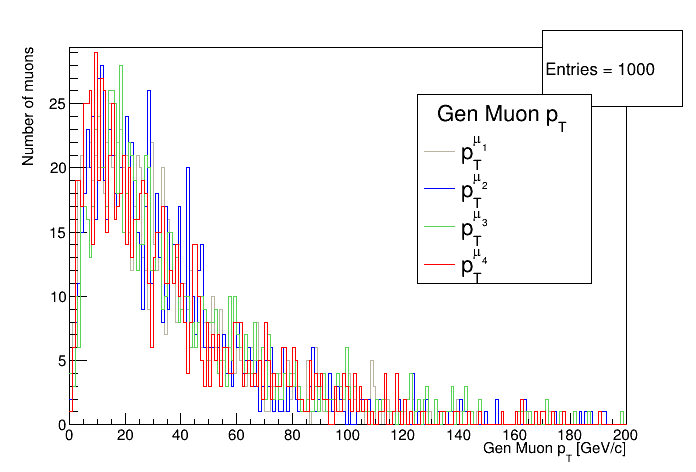

In [43]:
c1 = TCanvas( 'c1', 'Gen Muon Pt', 200, 10, 700, 500 )
hGenMu1Pt.SetLineColor(23)
hGenMu2Pt.SetLineColor(4)
hGenMu3Pt.SetLineColor(8)
hGenMu4Pt.SetLineColor(2)
hGenMu1Pt.Draw()
hGenMu2Pt.Draw("same")
hGenMu3Pt.Draw("same")
hGenMu4Pt.Draw("same")
hGenMu1Pt.SetTitle(" ");
hGenMu1Pt.GetXaxis().SetTitle("Gen Muon p_{T} [GeV/c]");
hGenMu1Pt.GetYaxis().SetTitle("Number of muons");
legend = TLegend(0.6,0.8,0.85,0.4);
legend.SetHeader("Gen Muon p_{T} ","C")
legend.AddEntry(hGenMu1Pt,"p_{T}^{#mu_{1}}","l");
legend.AddEntry(hGenMu2Pt,"p_{T}^{#mu_{2}}","l");
legend.AddEntry(hGenMu3Pt,"p_{T}^{#mu_{3}}","l");
legend.AddEntry(hGenMu4Pt,"p_{T}^{#mu_{4}}","l");
ROOT.gStyle.SetLegendTextSize(0.05);
ROOT.gStyle.SetOptStat("e");
legend.Draw();
c1.Draw()
#c1.SaveAs("./GenMuon1_Pt.png")



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


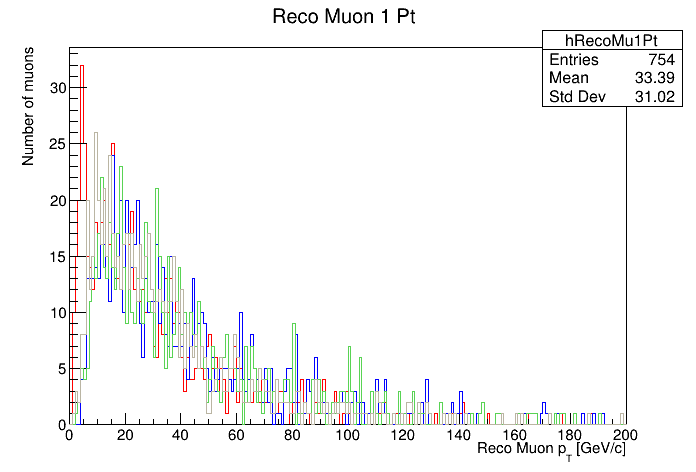

In [44]:
c2 = TCanvas( 'c2', 'Reco Muon Pt', 200, 10, 700, 500 )
hRecoMu1Pt.SetLineColor(2)
hRecoMu2Pt.SetLineColor(4)
hRecoMu3Pt.SetLineColor(8)
hRecoMu4Pt.SetLineColor(23)
hRecoMu1Pt.Draw()
hRecoMu2Pt.Draw("same")
hRecoMu3Pt.Draw("same")
hRecoMu4Pt.Draw("same")
hRecoMu1Pt.GetXaxis().SetTitle("Reco Muon p_{T} [GeV/c]");
hRecoMu1Pt.GetYaxis().SetTitle("Number of muons");
c2.Draw()

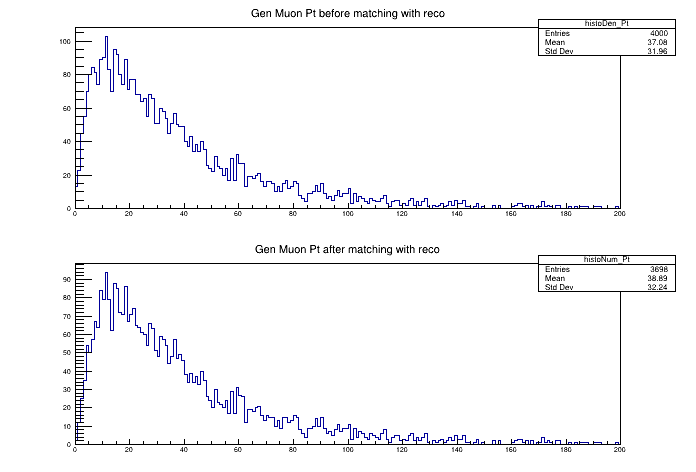

In [13]:
c4 = TCanvas( 'c4', 'Num and Den Pt', 200, 10, 700, 500 )
c4.Divide(1,2)
c4.cd(1)
histoDen_Pt.Draw()
c4.cd(2)
histoNum_Pt.Draw()
c4.Draw()

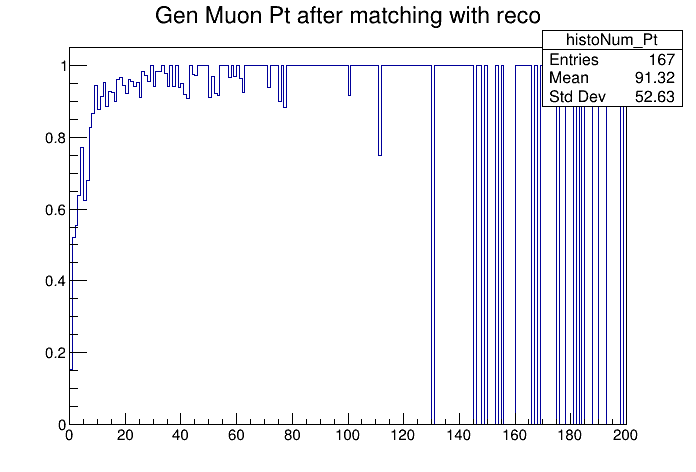

In [14]:
c3 = TCanvas( 'c3', 'Efficiency vs Pt', 200, 10, 700, 500 )
c3.cd()
h_EffPt=histoNum_Pt.Clone();
h_EffPt.Divide(histoDen_Pt);
h_EffPt.Draw("h");
#h_EffPt.Draw("he");
c3.Draw()

In [45]:
#c5 = TCanvas( 'c5', 'Efficiency vs Pt with TEfficiency', 200, 10, 700, 500 )
#c5.cd();
#genReco_Eff_pT = TEfficiency(histoNum_Pt,histoDen_Pt)
#genReco_Eff_pT.Draw()
#c5.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c6


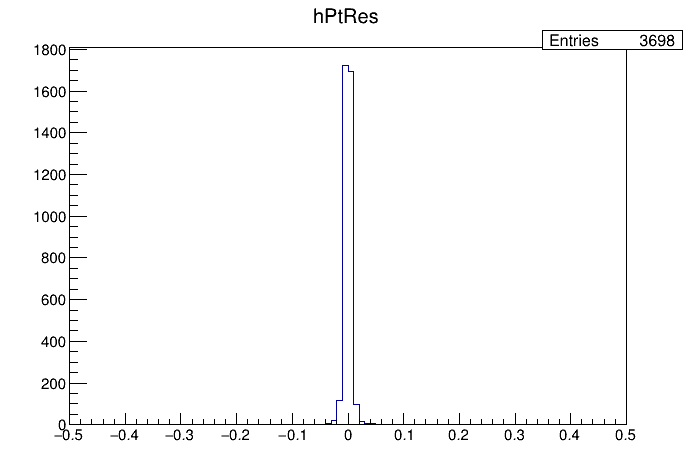

In [57]:
c6 = TCanvas( 'c6', 'Efficiency vs Pt with TEfficiency', 200, 10, 700, 500 )
c6.cd();
hPtRes.Draw()
c6.Draw()